# 1. Environment Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install pandas numpy tqdm matplotlib seaborn scikit-learn scikeras tensorflow keras keras-tuner scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Data Manipulation
import pandas as pd
import re
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Deep Learning
import tensorflow as tf
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D

## 1.1 Data Imports

In [ ]:
# Import Data
df = pd.read_csv('/content/drive/MyDrive/maastricht.csv')

# Separate features (X) and target variable (y)
X = df.drop('precipitation', axis=1)
y = df['precipitation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Base Model (CNN)
Below is a simple CNN learning model. This will give us a great place to start from and will serve as our baseline for future performances.

## 2.1 Structure
- **Input Layer:**
    - Receives the input data reshaped for CNNs (e.g., `(samples, timesteps, features)`).
    - The input layer uses 1D convolution to process the features along a temporal or spatial dimension.
- **Convolutional Layers:**
    - The first convolutional layer has 32 filters, a kernel size of 3, and uses the ReLU activation function.
    - The second convolutional layer has 64 filters, a kernel size of 3, and also uses the ReLU activation function.
- **Pooling Layers:**
    - Each convolutional layer is followed by a max-pooling layer with a pool size of 2 to reduce spatial dimensions and focus on significant features.
- **Flatten Layer:**
    - Converts the output of the convolutional and pooling layers into a 1D vector for input into dense layers.
- **Dense Layers:**
    - Includes two hidden dense layers with 64 and 32 neurons, respectively, using the ReLU activation function.
    - The final output layer contains a single neuron, as this is a regression task predicting a continuous value.
    - No activation function is applied in the output layer to produce raw predictions.

In [ ]:
# Reshape input data if necessary (e.g., (samples, timesteps, features))
# For example: X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add a second convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add another max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Add dense layers for regression
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(
    x=X_train,  # Ensure X_train is reshaped to 3D for CNN
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,609 (49.25 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2062 - mae: 0.2853 - val_loss: 0.1651 - val_mae: 0.2152
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1335 - mae: 0.2281 - val_loss: 0.1632 - val_mae: 0.2177
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1405 - mae: 0.2241 - val_loss: 0.1923 - val_mae: 0.2873
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1568 - mae: 0.2516 - val_loss: 0.1741 - val_mae: 0.2018
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1565 - mae: 0.2405 - val_loss: 0.1622 - val_mae: 0.2104
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1569 - mae: 0.2340 - val_loss: 0.1580 - val_mae: 0.2092
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1635 - mae: 0.2347 - val_loss: 0.1635 - val_mae: 0.2281
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1455 - mae: 0.2207 - val_loss: 0.1787 - val_mae: 0.2841
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1653 - mae:

## 2.2 Performance

Plotting the performance (training and validation loss) over epochs helps visualize the learning process of the model. It shows whether the model is learning effectively or if adjustments are needed. By observing these plots, you can identify whether the model is converging, overfitting, or underfitting.

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


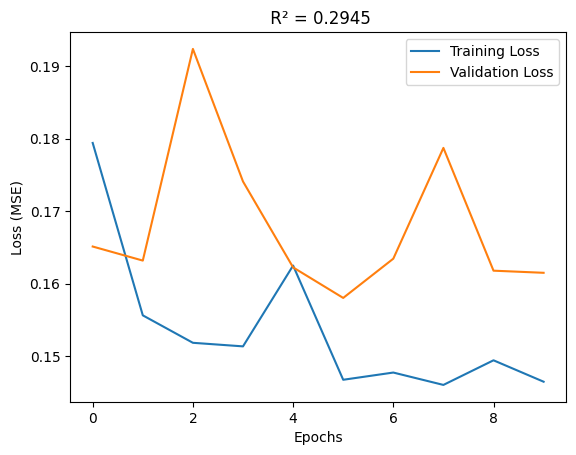

In [ ]:
def plot_model_results(history, model, X_test, y_test, title=""):
    """
    Plots training and validation loss over epochs and calculates R² score.

    Parameters:
    - history: History object from model training.
    - model: Trained model for making predictions.
    - X_test: Test features for prediction.
    - y_test: True values for R² calculation.
    - title: Custom title for each subplot
    """

    # Get training and validation loss from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Make predictions on the test set and flatten predictions
    y_pred = model.predict(X_test).flatten()

    # Calculate the R² score
    r2 = r2_score(y_test, y_pred)

    # Plot training and validation loss over epochs
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f"{title} R² = {r2:.4f}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()

plot_model_results(history, model, X_test, y_test)

# 3. Scaling Data


## **Standardization Scaler (Z-Score Normalization)**

- *What It Does*: Centers the data around the mean and scales it according to the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1.
- *How It Works*: Each value is transformed using: $(x - \text{mean}) / \text{std deviation}$.
- *When to Use*: Preferred when the data does not have a fixed range or when it follows a normal distribution.
- *Why*: Standardization ensures that features are centered and scaled, improving the performance of algorithms like linear regression and clustering, which assume normally distributed data.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape input data if necessary (e.g., (samples, timesteps, features))
# For example: X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add a second convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add another max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Add dense layers for regression
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(
    x=X_train_scaled,  # Ensure X_train is reshaped to 3D for CNN
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 2, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,609 (49.25 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1464 - mae: 0.2253 - val_loss: 0.1354 - val_mae: 0.2066
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1252 - mae: 0.2072 - val_loss: 0.1268 - val_mae: 0.2009
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1007 - mae: 0.1946 - val_loss: 0.1241 - val_mae: 0.1743
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1020 - mae: 0.1826 - val_loss: 0.1328 - val_mae: 0.2027
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0944 - mae: 0.1853 - val_loss: 0.1407 - val_mae: 0.2485
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1309 - mae: 0.2274 - val_loss: 0.1299 - val_mae: 0.1949
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1102 - mae: 0.1801 - val_loss: 0.1183 - val_mae: 0.1740
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1078 - mae: 0.1796 - val_loss: 0.1245 - val_mae: 0.1795
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0928 - mae: 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


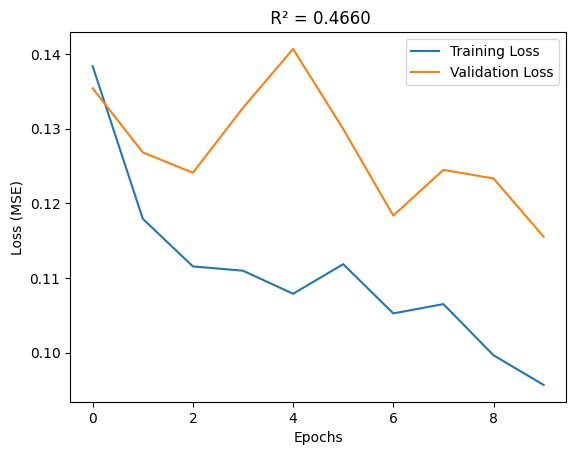

In [ ]:
plot_model_results(history, model, X_test_scaled, y_test)

## **MinMax Scaler**

- *What It Does*: Scales the features to a fixed range, typically between 0 and 1.
- *How It Works*: Transforms each feature by subtracting the minimum value and dividing by the range (max - min).
- *When to Use*: Useful when the data has a known minimum and maximum, or when you want to maintain zero-centered data but within a specific range.
- *Why*: It preserves the relationships between values while ensuring all features are on the same scale, which can be important for models sensitive to feature magnitudes (e.g., neural networks).

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape input data if necessary (e.g., (samples, timesteps, features))
# For example: X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add a second convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add another max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Add dense layers for regression
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(
    x=X_train_scaled,  # Ensure X_train is reshaped to 3D for CNN
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 2, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,609 (49.25 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1707 - mae: 0.2637 - val_loss: 0.1710 - val_mae: 0.2109
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1381 - mae: 0.2173 - val_loss: 0.1589 - val_mae: 0.2363
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1569 - mae: 0.2320 - val_loss: 0.1477 - val_mae: 0.1927
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1291 - mae: 0.1985 - val_loss: 0.1448 - val_mae: 0.1830
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1281 - mae: 0.1901 - val_loss: 0.1624 - val_mae: 0.2602
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1411 - mae: 0.2260 - val_loss: 0.1415 - val_mae: 0.1895
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1164 - mae: 0.1889 - val_loss: 0.1397 - val_mae: 0.1716
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1178 - mae: 0.1885 - val_loss: 0.1409 - val_mae: 0.1976
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1334 - mae

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


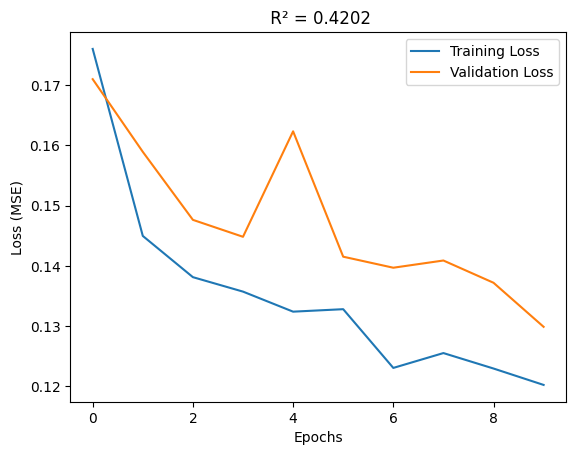

In [ ]:
plot_model_results(history, model, X_test_scaled, y_test)

# 4. Increase Epochs
The base model's loss has a downward trend, lets increase epoch's to see if this trend continues. Let's add early stopping for brevity's sake

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape input data if necessary (e.g., (samples, timesteps, features))
# For example: X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add a second convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add another max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output to feed into dense layers
model.add(Flatten())

# Add dense layers for regression
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,          # Stop if no improvement for 3 consecutive epochs
    restore_best_weights=True  # Revert to the best model weights
)

# Train the model
history = model.fit(
    x=X_train_scaled,  # Ensure X_train is reshaped to 3D for CNN
    y=y_train,
    epochs=50,          # Set higher max epochs to leverage early stopping
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include early stopping
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 2, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,609 (49.25 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1601 - mae: 0.2243 - val_loss: 0.1381 - val_mae: 0.1738
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1306 - mae: 0.1968 - val_loss: 0.1308 - val_mae: 0.1828
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1071 - mae: 0.1883 - val_loss: 0.1319 - val_mae: 0.2058
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1153 - mae: 0.1966 - val_loss: 0.1172 - val_mae: 0.1699
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1104 - mae: 0.1796 - val_loss: 0.1176 - val_mae: 0.1566
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1131 - mae: 0.1811 - val_loss: 0.1144 - val_mae: 0.1550
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1001 - mae: 0.1726 - val_loss: 0.1133 - val_mae: 0.1632
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0988 - mae: 0.1793 - val_loss: 0.1211 - val_mae: 0.1842
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0988 - mae: 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


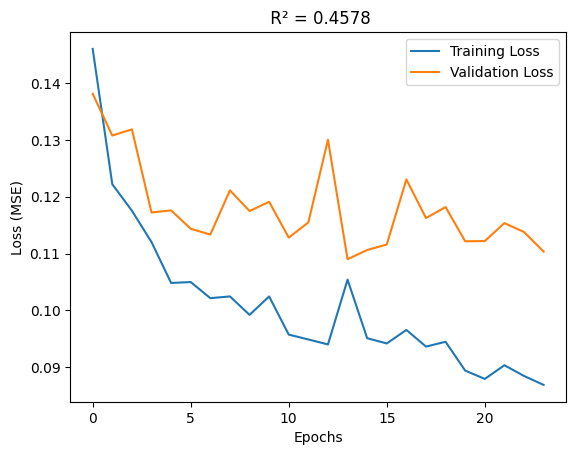

In [ ]:
plot_model_results(history, model, X_test_scaled, y_test)

# 5. Address Overfitting
The large gap between validation and training loss is textbook overfitting. Let's add some batch normalization and droupout layers to help address this.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)                   │ (None, 8, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 8, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 6, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 6, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,857 (132.25 KB)

 Trainable params: 33,473 (130.75 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.6501 - mae: 1.0003 - val_loss: 0.1955 - val_mae: 0.2018
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8071 - mae: 0.6815 - val_loss: 0.1867 - val_mae: 0.2265
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5384 - mae: 0.5608 - val_loss: 0.1766 - val_mae: 0.2303
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4964 - mae: 0.5273 - val_loss: 0.1625 - val_mae: 0.2076
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4319 - mae: 0.4830 - val_loss: 0.1467 - val_mae: 0.1998
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3328 - mae: 0.4326 - val_loss: 0.1419 - val_mae: 0.1835
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2784 - mae: 0.3905 - val_loss: 0.1394 - val_mae: 0.1772
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2374 - mae: 0.3567 - val_loss: 0.1311 - val_mae: 0.1794
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.223

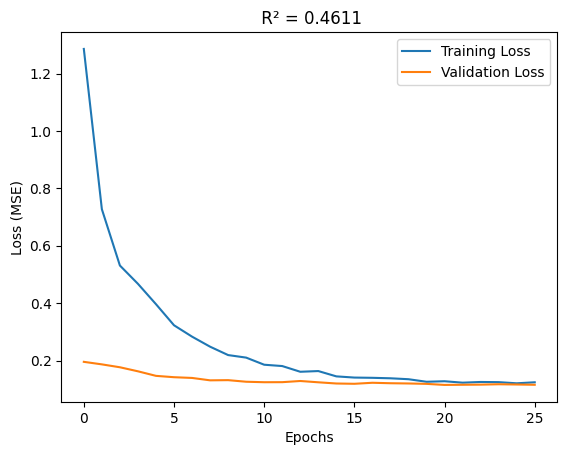

In [ ]:
# Reshape input data if necessary (e.g., (samples, timesteps, features))
# For example: X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the CNN model
model = Sequential()

# Add a convolutional layer with Batch Normalization and Dropout
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
#model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))  # Dropout rate of 30%

# Add a second convolutional layer with Batch Normalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))  # Dropout rate of 30%

# Flatten the output to feed into dense layers
model.add(Flatten())

# Add dense layers with Batch Normalization and Dropout
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Dropout rate of 40%

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Dropout rate of 40%

# Output layer for regression
model.add(Dense(1))  # No activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,         # Stop if no improvement for 10 consecutive epochs
    restore_best_weights=True  # Revert to the best model weights
)

# Train the model
history = model.fit(
    x=X_train_scaled,  # Ensure X_train is reshaped to 3D for CNN
    y=y_train,
    epochs=100,          # Set higher max epochs to leverage early stopping
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include early stopping
)

plot_model_results(history, model, X_test_scaled, y_test)

# 6. Hyperparameter Tuning

Trial 90 Complete [00h 00m 14s]
val_loss: 0.12118740379810333

Best val_loss So Far: 0.10865254700183868
Total elapsed time: 00h 16m 39s

Best Hyperparameters:
Filters for Layer 1: 64
Kernel Size for Layer 1: 5
Batch Norm for Layer 1: False
Dropout for Layer 1: 0.3
Filters for Layer 2: 128
Kernel Size for Layer 2: 5
Batch Norm for Layer 2: False
Dropout for Layer 2: 0.2
Dense Units: 128
Dropout for Dense Layer: 0.3
Learning Rate: 0.001

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1509 - mae: 0.2334 - val_loss: 0.1280 - val_mae: 0.1890
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1190 - mae: 0.2057 - val_loss: 0.1185 - val_mae: 0.1623
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1203 - mae: 0.1877 - val_loss: 0.1155 - val_mae: 0.1619
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1200 - mae: 0.1936 - val_loss: 0.1179 - val_mae: 0.1537
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1277 - mae: 0.1913 - val_loss: 0.1179 - val_mae: 0.1519
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1119 - mae: 0.1854 - val_loss: 0.1229 - val_mae: 0.1672
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1053 - mae: 0.1804 - val_loss: 0.1152 - val_mae: 0.1543
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1153 - mae: 0.1850 - val_loss: 0.1126 - val_mae: 0.1562
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1121 - mae: 0.1868 - va

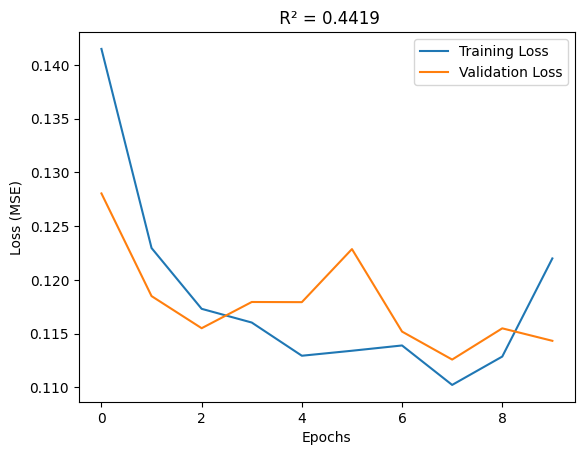

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# Define a model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # Tune the number of filters and kernel size for the first Conv1D layer
    model.add(
        Conv1D(
            filters=hp.Choice('filters_1', values=[16, 32, 64]),
            kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
            activation='relu',
            input_shape=(X_train_scaled.shape[1], 1)
        )
    )
    if hp.Boolean('batch_norm_1'):
        model.add(BatchNormalization())
    model.add(Dropout(hp.Choice('dropout_1', values=[0.1, 0.2, 0.3])))

    # Tune the number of filters for the second Conv1D layer
    model.add(
        Conv1D(
            filters=hp.Choice('filters_2', values=[32, 64, 128]),
            kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
            activation='relu'
        )
    )
    if hp.Boolean('batch_norm_2'):
        model.add(BatchNormalization())
    model.add(Dropout(hp.Choice('dropout_2', values=[0.1, 0.2, 0.3])))

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(hp.Choice('dense_units', values=[32, 64, 128]), activation='relu'))
    model.add(Dropout(hp.Choice('dropout_dense', values=[0.1, 0.2, 0.3])))
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mse',
        metrics=['mae']
    )
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,   # Run each trial for 10 epochs
    factor=3,        # Reduce epochs per bracket by a factor of 3
    directory='hyperparameter_tuning',
    project_name='cnn_hyper_tuning2'
)

# Set up early stopping for better performance
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Run the hyperparameter search
tuner.search(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=10,  # Match the number of epochs to max_epochs in Hyperband
    callbacks=[early_stopping]
)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
Filters for Layer 1: {best_hps.get('filters_1')}
Kernel Size for Layer 1: {best_hps.get('kernel_size_1')}
Batch Norm for Layer 1: {best_hps.get('batch_norm_1')}
Dropout for Layer 1: {best_hps.get('dropout_1')}
Filters for Layer 2: {best_hps.get('filters_2')}
Kernel Size for Layer 2: {best_hps.get('kernel_size_2')}
Batch Norm for Layer 2: {best_hps.get('batch_norm_2')}
Dropout for Layer 2: {best_hps.get('dropout_2')}
Dense Units: {best_hps.get('dense_units')}
Dropout for Dense Layer: {best_hps.get('dropout_dense')}
Learning Rate: {best_hps.get('learning_rate')}
""")

# Build the best model and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=10,  # Final training with the chosen hyperparameters
    callbacks=[early_stopping]
)

plot_model_results(history, best_model, X_test_scaled, y_test)
